Random Forest Exploring RMSE

In [1]:
import pandas as pd
preds = pd.read_csv('/project/SDS-capstones-kropko21/uva-astronomy/eda/preds_small_model.csv')
display(preds.describe())

y_true = pd.read_csv('/project/SDS-capstones-kropko21/uva-astronomy/eda/true_output.csv')
display(y_true.describe())

,Output_Bin_0,Output_Bin_1,Output_Bin_2,Output_Bin_3,Output_Bin_4,Output_Bin_5,Output_Bin_6,Output_Bin_7,Output_Bin_8,Output_Bin_9,...,Output_Bin_161,Output_Bin_162,Output_Bin_163,Output_Bin_164,Output_Bin_165,Output_Bin_166,Output_Bin_167,Output_Bin_168,Output_Bin_169,Output_Bin_170
count,142330.000000,142330.000000,142330.000000,142330.000000,142330.000000,142330.000000,142330.000000,142330.000000,142330.000000,142330.000000,...,1.423300e+05,1.423300e+05,1.423300e+05,1.423300e+05,1.423300e+05,1.423300e+05,1.423300e+05,1.423300e+05,1.423300e+05,1.423300e+05
mean,0.004788,0.003511,0.003102,0.003486,0.003460,0.003500,0.003645,0.003776,0.003930,0.004017,...,1.404788e-03,1.228211e-03,1.033582e-03,8.586573e-04,7.036644e-04,6.541404e-04,1.922461e-03,5.273221e-03,1.630822e-02,1.516031e-01
std,0.011140,0.007488,0.006321,0.006792,0.006433,0.006304,0.006349,0.006411,0.006534,0.006498,...,6.306908e-03,5.568418e-03,4.604700e-03,3.595224e-03,2.706642e-03,2.228442e-03,3.897385e-03,1.147480e-02,3.831590e-02,3.168911e-01
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000030,0.000032,0.000033,0.000042,0.000048,0.000055,0.000061,0.000072,0.000084,0.000097,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000319,0.000317,0.000331,0.000395,0.000460,0.000526,0.000598,0.000690,0.000782,0.000876,...,2.104935e-08,1.814294e-08,1.527711e-08,4.901697e-08,4.001441e-08,5.336136e-08,3.669979e-08,1.904602e-08,8.371237e-09,2.120712e-08
75%,0.002824,0.002537,0.002477,0.002942,0.003268,0.003581,0.003951,0.004393,0.004765,0.005112,...,3.316706e-05,3.463828e-05,3.171370e-05,2.945165e-05,3.194083e-05,7.372995e-05,8.015071e-04,1.051264e-03,1.302165e-03,9.691511e-03
max,0.073024,0.045028,0.036129,0.036601,0.034177,0.033252,0.033275,0.033448,0.038070,0.036593,...,5.878371e-02,5.479528e-02,4.496401e-02,3.594975e-02,2.911589e-02,2.138350e-02,1.700903e-02,4.628636e-02,1.514179e-01,9.986913e-01


,Output_Bin_0,Output_Bin_1,Output_Bin_2,Output_Bin_3,Output_Bin_4,Output_Bin_5,Output_Bin_6,Output_Bin_7,Output_Bin_8,Output_Bin_9,...,Output_Bin_161,Output_Bin_162,Output_Bin_163,Output_Bin_164,Output_Bin_165,Output_Bin_166,Output_Bin_167,Output_Bin_168,Output_Bin_169,Output_Bin_170
count,1.423300e+05,1.423300e+05,1.423300e+05,1.423300e+05,1.423300e+05,1.423300e+05,1.423300e+05,1.423300e+05,1.423300e+05,1.423300e+05,...,142330.000000,142330.000000,142330.000000,142330.000000,142330.000000,142330.000000,142330.000000,142330.000000,142330.000000,142330.000000
mean,4.788404e-03,3.511234e-03,3.102781e-03,3.476701e-03,3.457728e-03,3.501525e-03,3.642096e-03,3.778553e-03,3.935451e-03,4.021584e-03,...,0.001428,0.001252,0.001058,0.000883,0.000728,0.000676,0.001939,0.005278,0.016270,0.151275
std,1.166852e-02,7.803030e-03,6.573299e-03,7.853398e-03,6.781768e-03,6.542634e-03,6.904298e-03,6.660142e-03,7.485042e-03,6.836560e-03,...,0.007746,0.007059,0.006218,0.005424,0.004790,0.004623,0.006232,0.013469,0.040799,0.326542
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.413419e-11,5.957408e-11,2.004835e-10,7.735218e-10,2.203720e-09,4.972974e-09,1.233129e-08,2.641020e-08,5.567167e-08,1.080826e-07,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.091139e-04,1.224256e-04,1.354748e-04,1.791490e-04,2.160863e-04,2.491617e-04,2.911052e-04,3.537974e-04,4.251557e-04,5.010170e-04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.666961e-03,2.534129e-03,2.509944e-03,2.984808e-03,3.315966e-03,3.667415e-03,4.060019e-03,4.502340e-03,4.900773e-03,5.306905e-03,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.354140e-02,5.693502e-02,4.501455e-02,3.978454e-01,1.493864e-01,3.745879e-02,2.716096e-01,3.748155e-02,3.097229e-01,1.159227e-01,...,0.086597,0.087307,0.087176,0.087361,0.087655,0.091350,0.105380,0.133252,0.245536,0.999991


Function to calcuate RMSE column wise

In [2]:
from sklearn.metrics import mean_squared_error
import numpy as np
def calculate_rmse(y_true, preds):
    rmse_arr = []
    for i in range (171):
        rmse = np.sqrt( mean_squared_error( y_true[[y_true.columns[i]]], preds[[preds.columns[i]]]))
        rmse_arr.append((i+1,rmse))
    return rmse_arr

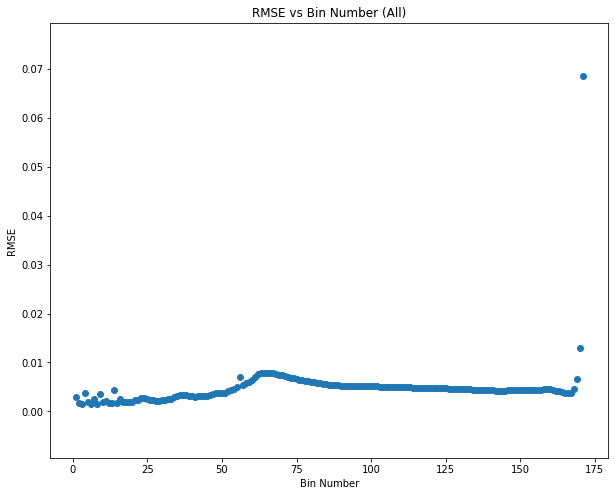

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(*zip(*calculate_rmse(y_true, preds)))
plt.title("RMSE vs Bin Number (All)")
plt.xlabel('Bin Number')
plt.ylabel('RMSE')
plt.show()

In [5]:
def calculate_rmse_row(X_input, y_true, preds):
    rmse_arr = []
    for i in range (len(y_true)):
        rmse = np.sqrt( mean_squared_error( y_true.iloc[i], preds.iloc[i]))
        rmse_arr.append((X_input[i],rmse))
    return rmse_arr

In [23]:
X = pd.read_csv('/project/SDS-capstones-kropko21/uva-astronomy/eda/true_input.csv')

IndexError: list index out of range

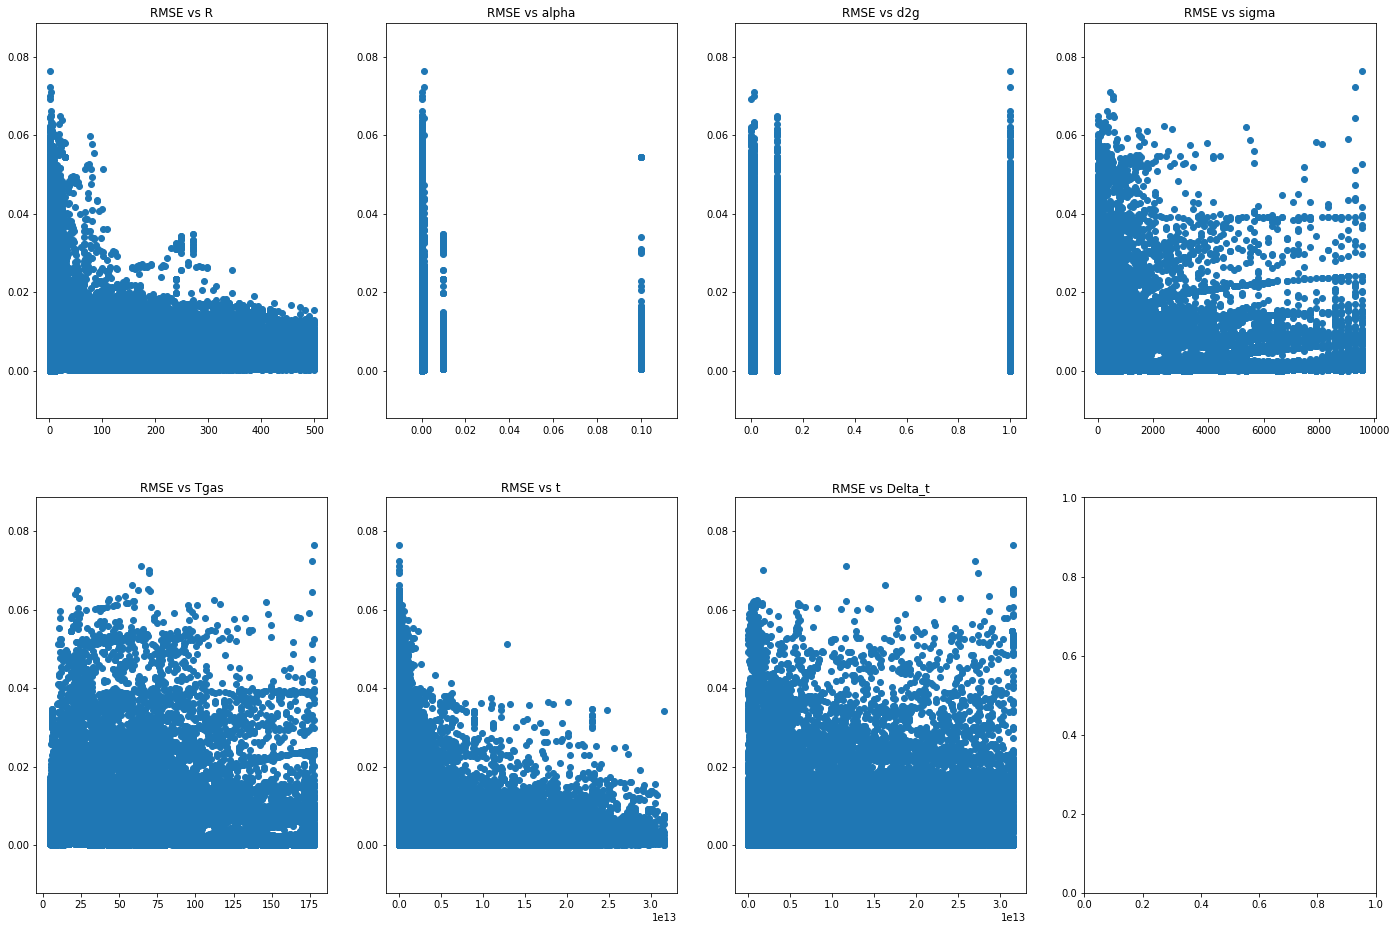

In [28]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(24, 16))
# Column names from out input
input_names = ['R', 'alpha', 'd2g',	'sigma', 'Tgas', 't', 'Delta_t']
for idx, ax in enumerate(axes.flatten()):
        
    # Get the iname of the input parameter and generate a scatterplot
    input_name = input_names[idx]
    ax.scatter(*zip(*calculate_rmse_row(X[input_name], y_true, preds)))
    #ax.legend(loc="upper left")
    ax.set_title(f'RMSE vs {input_name}')

Extra code for splitting good/bad do

In [ ]:

import matplotlib.pyplot as plt

preds_bad = pd.read_csv('/project/SDS-capstones-kropko21/uva-astronomy/eda/preds_small_model_bad.csv')

y_true_bad = pd.read_csv('/project/SDS-capstones-kropko21/uva-astronomy/eda/true_output_bad.csv')
X_bad = pd.read_csv('/project/SDS-capstones-kropko21/uva-astronomy/eda/true_input_bad.csv')
plt.scatter(*zip(*calculate_rmse(y_true_bad, preds_bad)))
plt.title("RMSE vs Bin Number (Bad)")
plt.show()

X_good = pd.read_csv('/project/SDS-capstones-kropko21/uva-astronomy/eda/true_input_good.csv')
preds_good = pd.read_csv('/project/SDS-capstones-kropko21/uva-astronomy/eda/preds_small_model_good.csv')
y_true_good = pd.read_csv('/project/SDS-capstones-kropko21/uva-astronomy/eda/true_output_good.csv')

